<a href="https://colab.research.google.com/github/Didier06/IA_licence_pro_chimie/blob/main/Bayes_RDKIT_Toxicite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# üß™ Installation et imports pour Colab
# ------------------------------------
!pip install rdkit scikit-learn pandas seaborn matplotlib -q

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.parse import quote_plus

print("‚úÖ Imports r√©ussis ‚Äî RDKit pr√™t √† l'emploi")


‚úÖ Imports r√©ussis ‚Äî RDKit pr√™t √† l'emploi


2Ô∏è‚É£ Chargement du jeu de donn√©es
‚û°Ô∏è T√©l√©charge d‚Äôabord le fichier qsar_oral_toxicity.csv depuis :
https://archive.ics.uci.edu/ml/datasets/QSAR%2Boral%2Btoxicity
et place-le dans le m√™me dossier que ce notebook.

In [13]:
# T√©l√©chargement qsar_oral_toxicity.csv

# Lecture correcte du fichier
df = pd.read_csv("qsar_oral_toxicity.csv", sep=";", header=None)
n_features = df.shape[1] - 1
df.columns = [f"X{i}" for i in range(n_features)] + ["CLASS"]

print("‚úÖ Dataset charg√© :", df.shape)
print(df["CLASS"].value_counts())


‚úÖ Dataset charg√© : (8992, 1025)
CLASS
negative    8251
positive     741
Name: count, dtype: int64


In [14]:
# 2Ô∏è‚É£ Entra√Ænement rapide du mod√®le Na√Øve Bayes
X = df.drop(columns=["CLASS"])
y = df["CLASS"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = GaussianNB()
model.fit(X_train, y_train)

print("üìä Accuracy sur jeu de test :", round(model.score(X_test, y_test), 3))


üìä Accuracy sur jeu de test : 0.78


Exemples de SMILES :
 - Caf√©ine     : Cn1cnc2c1c(=O)n(C)c(=O)n2C
 - Aspirine    : CC(=O)Oc1ccccc1C(=O)O
 - Parac√©tamol : CC(=O)NC1=CC=C(C=C1)O

üíä Entrez le SMILES de la mol√©cule √† tester : Cn1cnc2c1c(=O)n(C)c(=O)n2C


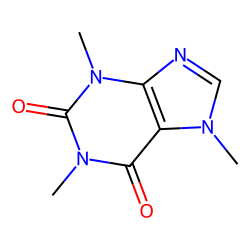

In [15]:
# 3Ô∏è‚É£ Entr√©e d'une mol√©cule (par SMILES ou nom commun via exemple)
print("Exemples de SMILES :")
print(" - Caf√©ine     : Cn1cnc2c1c(=O)n(C)c(=O)n2C")
print(" - Aspirine    : CC(=O)Oc1ccccc1C(=O)O")
print(" - Parac√©tamol : CC(=O)NC1=CC=C(C=C1)O")

smiles = input("\nüíä Entrez le SMILES de la mol√©cule √† tester : ")
mol = Chem.MolFromSmiles(smiles)
if mol is None:
    raise ValueError("‚ùå SMILES invalide, r√©essayez.")

Draw.MolToImage(mol, size=(250,250))


Exemples de SMILES :
 - Caf√©ine     : Cn1cnc2c1c(=O)n(C)c(=O)n2C
 - Aspirine    : CC(=O)Oc1ccccc1C(=O)O
 - Parac√©tamol : CC(=O)NC1=CC=C(C=C1)O

üíä Entrez le SMILES de la mol√©cule √† tester : Cn1cnc2c1c(=O)n(C)c(=O)n2C


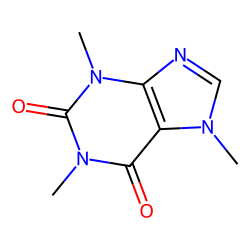

In [16]:
# 3Ô∏è‚É£ Entr√©e d'une mol√©cule (par SMILES ou nom commun via exemple)
print("Exemples de SMILES :")
print(" - Caf√©ine     : Cn1cnc2c1c(=O)n(C)c(=O)n2C")
print(" - Aspirine    : CC(=O)Oc1ccccc1C(=O)O")
print(" - Parac√©tamol : CC(=O)NC1=CC=C(C=C1)O")

smiles = input("\nüíä Entrez le SMILES de la mol√©cule √† tester : ")
mol = Chem.MolFromSmiles(smiles)
if mol is None:
    raise ValueError("‚ùå SMILES invalide, r√©essayez.")

Draw.MolToImage(mol, size=(250,250))


Exemples de SMILES :
 - Caf√©ine     : Cn1cnc2c1c(=O)n(C)c(=O)n2C
 - Aspirine    : CC(=O)Oc1ccccc1C(=O)O
 - Parac√©tamol : CC(=O)NC1=CC=C(C=C1)O

üíä Entrez le SMILES de la mol√©cule √† tester : Cn1cnc2c1c(=O)n(C)c(=O)n2C


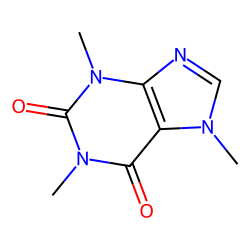

In [17]:
# 3Ô∏è‚É£ Entr√©e d'une mol√©cule (par SMILES ou nom commun via exemple)
print("Exemples de SMILES :")
print(" - Caf√©ine     : Cn1cnc2c1c(=O)n(C)c(=O)n2C")
print(" - Aspirine    : CC(=O)Oc1ccccc1C(=O)O")
print(" - Parac√©tamol : CC(=O)NC1=CC=C(C=C1)O")

smiles = input("\nüíä Entrez le SMILES de la mol√©cule √† tester : ")
mol = Chem.MolFromSmiles(smiles)
if mol is None:
    raise ValueError("‚ùå SMILES invalide, r√©essayez.")

Draw.MolToImage(mol, size=(250,250))


In [18]:
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

# Cr√©ation du g√©n√©rateur ECFP4 (radius=2, nBits=1024)
gen = GetMorganGenerator(radius=2, fpSize=1024)
fp = gen.GetFingerprint(mol)
fp_array = list(map(int, fp.ToBitString()))


# 4Ô∏è‚É£ Calcul de l'empreinte ECFP4 (1024 bits) et pr√©diction
#fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)
#fp_array = list(map(int, fp.ToBitString()))

X_new = pd.DataFrame([fp_array], columns=X_train.columns)

prediction = model.predict(X_new)[0]
proba = model.predict_proba(X_new)[0]

# Interpr√©tation p√©dagogique
p_tox = proba[ list(model.classes_).index("positive") ]
niveau = (
    "üü¢ Faible probabilit√© de toxicit√©"
    if p_tox < 0.3 else
    "üü† Probabilit√© mod√©r√©e de toxicit√©"
    if p_tox < 0.7 else
    "üî¥ Probabilit√© √©lev√©e de toxicit√©"
)

print(f"\nüî¨ Mol√©cule : {smiles}")
print(f"Classe pr√©dite : {prediction}")
print(f"Probabilit√©s ‚Üí non toxique : {round(proba[ list(model.classes_).index('negative') ],2)} | toxique : {round(p_tox,2)}")
print(niveau)



üî¨ Mol√©cule : Cn1cnc2c1c(=O)n(C)c(=O)n2C
Classe pr√©dite : negative
Probabilit√©s ‚Üí non toxique : 1.0 | toxique : 0.0
üü¢ Faible probabilit√© de toxicit√©


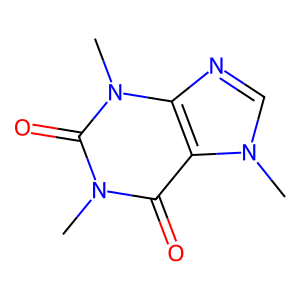

In [19]:
# 5Ô∏è‚É£ Affichage de la mol√©cule et lien vers ProTox-II pour comparaison
from IPython.display import display, HTML

img = Draw.MolToImage(mol, size=(300,300))
display(img)

lien_protox = "https://tox-new.charite.de/protox_II/index.php?smiles=" + quote_plus(smiles)
display(HTML(f"<b>üîó Tester cette mol√©cule sur <a href='{lien_protox}' target='_blank'>ProTox-II</a></b>"))


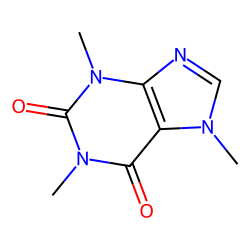


üî¨ Mol√©cule : Cn1cnc2c1c(=O)n(C)c(=O)n2C
Classe pr√©dite : negative
Probabilit√©s ‚Üí non toxique : 1.0 | toxique : 0.0
üü¢ Faible probabilit√© de toxicit√©
‚úÖ Le mod√®le pr√©dit que cette mol√©cule est probablement NON TOXIQUE (negative).


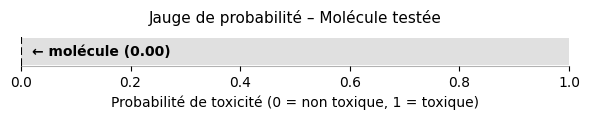

In [20]:
# üß™ Calcul de l'empreinte mol√©culaire ECFP4 (1024 bits) et pr√©diction sans avertissement RDKit
from rdkit.Chem import Draw
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
import matplotlib.pyplot as plt

# V√©rification du SMILES
if mol is None:
    raise ValueError(f"‚ùå SMILES invalide : {smiles}")

# Affichage de la mol√©cule
display(Draw.MolToImage(mol, size=(250, 250)))

# G√©n√©rateur d'empreintes ECFP4 (nouvelle API RDKit, sans warning)
gen = GetMorganGenerator(radius=2, fpSize=1024)
fp = gen.GetFingerprint(mol)
fp_array = list(map(int, fp.ToBitString()))

# Pr√©paration des donn√©es pour le mod√®le
X_new = pd.DataFrame([fp_array], columns=X_train.columns)

# Pr√©diction
prediction = model.predict(X_new)[0]
proba = model.predict_proba(X_new)[0]

# Probabilit√© associ√©e √† la classe "positive"
p_tox = proba[list(model.classes_).index("positive")]

# Niveau d‚Äôinterpr√©tation
niveau = (
    "üü¢ Faible probabilit√© de toxicit√©"
    if p_tox < 0.3 else
    "üü† Probabilit√© mod√©r√©e de toxicit√©"
    if p_tox < 0.7 else
    "üî¥ Probabilit√© √©lev√©e de toxicit√©"
)

# Affichage textuel
print(f"\nüî¨ Mol√©cule : {smiles}")
print(f"Classe pr√©dite : {prediction}")
print(f"Probabilit√©s ‚Üí non toxique : {round(proba[list(model.classes_).index('negative')], 2)} | toxique : {round(p_tox, 2)}")
print(niveau)

# Message synth√©tique
if prediction == "positive":
    print("‚ö†Ô∏è Le mod√®le pr√©dit que cette mol√©cule pourrait √™tre TOXIQUE (positive).")
else:
    print("‚úÖ Le mod√®le pr√©dit que cette mol√©cule est probablement NON TOXIQUE (negative).")

# üéØ Jauge de probabilit√© de toxicit√© avec rep√®re de la mol√©cule test√©e
fig, ax = plt.subplots(figsize=(6, 1.3))

# Couleur en fonction du niveau de toxicit√©
color = "green" if p_tox < 0.3 else "orange" if p_tox < 0.7 else "red"

# Barre horizontale repr√©sentant l'√©chelle 0 ‚Üí 1
ax.barh(["Toxicit√© pr√©dite"], [1], color="#e0e0e0", height=0.3)  # fond gris clair
ax.barh(["Toxicit√© pr√©dite"], [p_tox], color=color, height=0.3)  # portion color√©e

# Ligne verticale (rep√®re de la mol√©cule)
ax.axvline(p_tox, color="black", linestyle="--", linewidth=1.5)
ax.text(p_tox + 0.02, 0, f"‚Üê mol√©cule ({p_tox:.2f})", va="center", fontsize=10, fontweight="bold")

# R√©glages de l'axe
ax.set_xlim(0, 1)
ax.set_xlabel("Probabilit√© de toxicit√© (0 = non toxique, 1 = toxique)")
ax.set_title("Jauge de probabilit√© ‚Äì Mol√©cule test√©e", fontsize=11, pad=10)

# Masquer les rep√®res inutiles
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(0.3)

plt.tight_layout()
plt.show()

